In [1]:
from ISLP import load_data
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [2]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
import numpy as np

# log transformation (medv → medv_log)
Boston['medv_log'] = np.log(Boston['medv'])


Boston.drop(columns=['medv'], inplace=True)


print(Boston.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv_log  
0   4.98  3.178054  
1   9.14  3.072693  
2   4.03  3.546740  
3   2.94  3.508556  
4   5.33  3.589059  


<Figure size 1200x800 with 0 Axes>

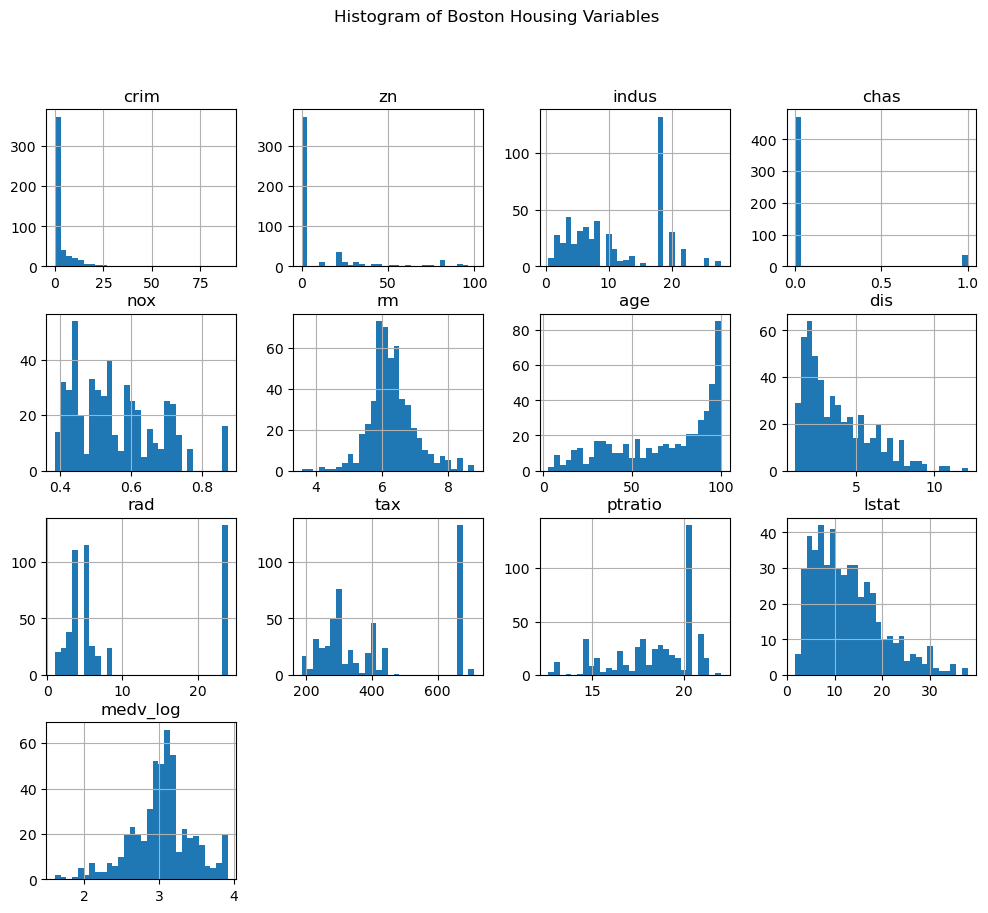

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
Boston.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histogram of Boston Housing Variables")
plt.show()


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Z-score
z_scores = np.abs(stats.zscore(Boston))


outliers = (z_scores > 3).sum(axis=0)
outliers_df = pd.DataFrame({"Feature": Boston.columns, "Outlier Count": outliers})


print("### Feature outliers (Z-score > 3 ) ###")
print(outliers_df.sort_values(by="Outlier Count", ascending=False))


### Feature outliers (Z-score > 3 ) ###
           Feature  Outlier Count
chas          chas             35
zn              zn             14
crim          crim              8
rm              rm              8
dis            dis              5
lstat        lstat              5
medv_log  medv_log              3
indus        indus              0
nox            nox              0
age            age              0
rad            rad              0
tax            tax              0
ptratio    ptratio              0


### highest correlation pair ###
   Feature1  Feature2  Correlation
68      rad       tax     0.910228
77    lstat  medv_log    -0.805034
44      nox       dis    -0.769230
24    indus       nox     0.763651
57      age       dis    -0.747881
43      nox       age     0.731470
29    indus       tax     0.720760
27    indus       dis    -0.708027
46      nox       tax     0.668023
17       zn       dis     0.664408


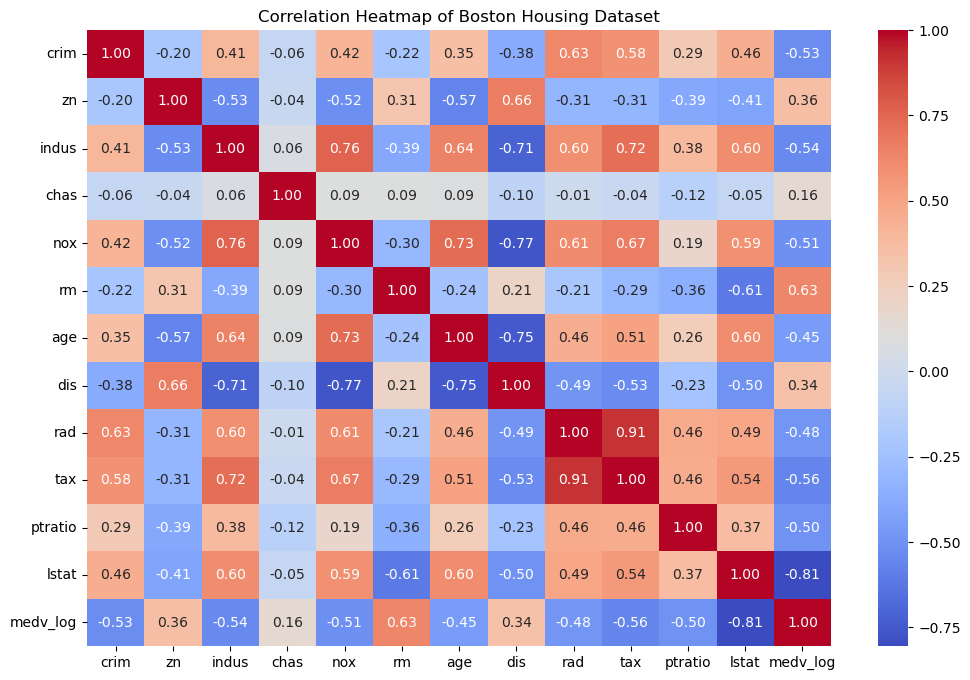

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


corr_matrix = Boston.corr()


corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={0: "Correlation", "level_0": "Feature1", "level_1": "Feature2"})
)

top_corr_pairs = corr_pairs.reindex(corr_pairs["Correlation"].abs().sort_values(ascending=False).index)

print("### highest correlation pair ###")
print(top_corr_pairs.head(10))

# Heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Boston Housing Dataset")
plt.show()


In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Z-score: remove outlier (Z-score > 3), except for chas
z_scores = np.abs(stats.zscore(Boston.drop(columns=['chas'])))  
Boston_cleaned = Boston[(z_scores < 3).all(axis=1)]  


Boston_cleaned['chas'] = Boston['chas']


y_cleaned = Boston_cleaned['medv_log']
X_cleaned = Boston_cleaned.drop(columns=['medv_log'])
X_cleaned = sm.add_constant(X_cleaned) 


model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()


print(model_cleaned.summary())


vif_data_cleaned = pd.DataFrame()
vif_data_cleaned["Feature"] = X_cleaned.columns
vif_data_cleaned["VIF"] = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]


print("\n### VIF after removing outliers) ###")
print(vif_data_cleaned)


                            OLS Regression Results                            
Dep. Variable:               medv_log   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     138.0
Date:                Mon, 26 May 2025   Prob (F-statistic):          3.78e-143
Time:                        20:25:47   Log-Likelihood:                 149.91
No. Observations:                 468   AIC:                            -273.8
Df Residuals:                     455   BIC:                            -219.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0080      0.206     19.493      0.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
# Remove insignificant variables
X_reduced = X_cleaned.drop(columns=['indus', 'age', 'zn'])

# Fit the reduced regression model
model_reduced = sm.OLS(y_cleaned, X_reduced).fit()


print(model_reduced.summary())

# VIF
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]


print("\n### VIF (after removing indus, age, zn) ###")
print(vif_data_reduced)


                            OLS Regression Results                            
Dep. Variable:               medv_log   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 26 May 2025   Prob (F-statistic):          2.92e-146
Time:                        20:26:59   Log-Likelihood:                 149.31
No. Observations:                 468   AIC:                            -278.6
Df Residuals:                     458   BIC:                            -237.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9987      0.204     19.640      0.0

In [74]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

baseline_values = pd.DataFrame({
    "const": [1],  #must be 1
    "crim": [0.5],
    "chas": [0],  
    "nox": [0.5],
    "rm": [6],
    "dis": [5],
    "rad": [5],
    "tax": [300],
    "ptratio": [18],
    "lstat": [12]
})


print("Baseline Variables:", baseline_values.columns)


predictions = model_reduced.get_prediction(baseline_values)

log_medv_pred = predictions.predicted_mean[0]

conf_int = predictions.conf_int(alpha=0.05)  # 95% 신뢰구간
log_medv_lower = conf_int[0][0]
log_medv_upper = conf_int[0][1]

medv_pred = round(np.exp(log_medv_pred) * 1000, 2)
medv_lower = round(np.exp(log_medv_lower) * 1000, 2)
medv_upper = round(np.exp(log_medv_upper) * 1000, 2)

medv_pred, (medv_lower, medv_upper)


Baseline Variables: Index(['const', 'crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio',
       'lstat'],
      dtype='object')


(20912.94, (20427.85, 21409.55))

In [13]:
#make a dataset without rad
X_reduced_rad = X_cleaned.drop(columns=['rad'])


model_reduced_rad = sm.OLS(y_cleaned, X_reduced_rad).fit()


print(model_reduced_rad.summary())

# VIF
vif_data_reduced_rad = pd.DataFrame()
vif_data_reduced_rad["Feature"] = X_reduced_rad.columns
vif_data_reduced_rad["VIF"] = [variance_inflation_factor(X_reduced_rad.values, i) for i in range(X_reduced_rad.shape[1])]

# VIF 
print("\n### VIF (without rad) ###")
print(vif_data_reduced_rad)


                            OLS Regression Results                            
Dep. Variable:               medv_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     140.2
Date:                Mon, 26 May 2025   Prob (F-statistic):          1.36e-138
Time:                        20:28:17   Log-Likelihood:                 136.47
No. Observations:                 468   AIC:                            -248.9
Df Residuals:                     456   BIC:                            -199.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6693      0.200     18.307      0.0

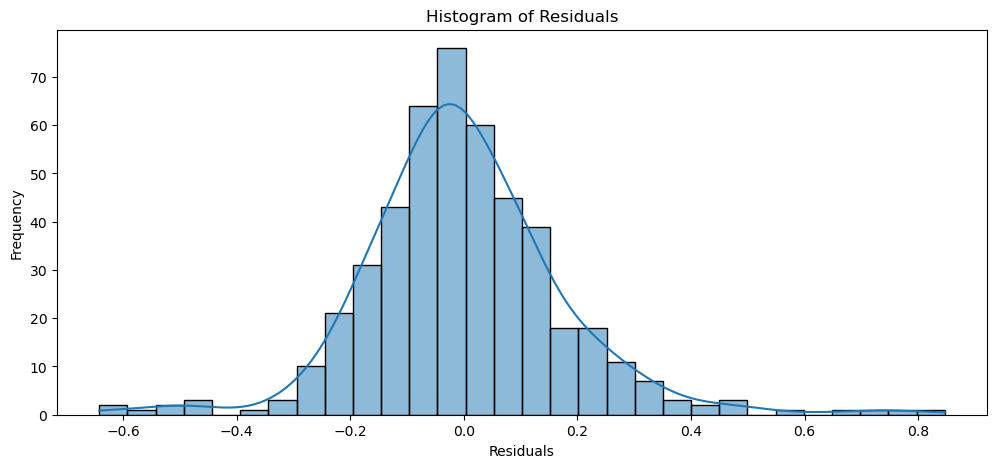

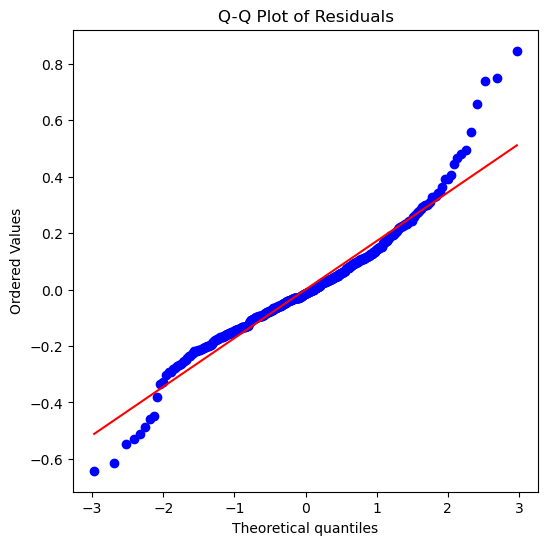

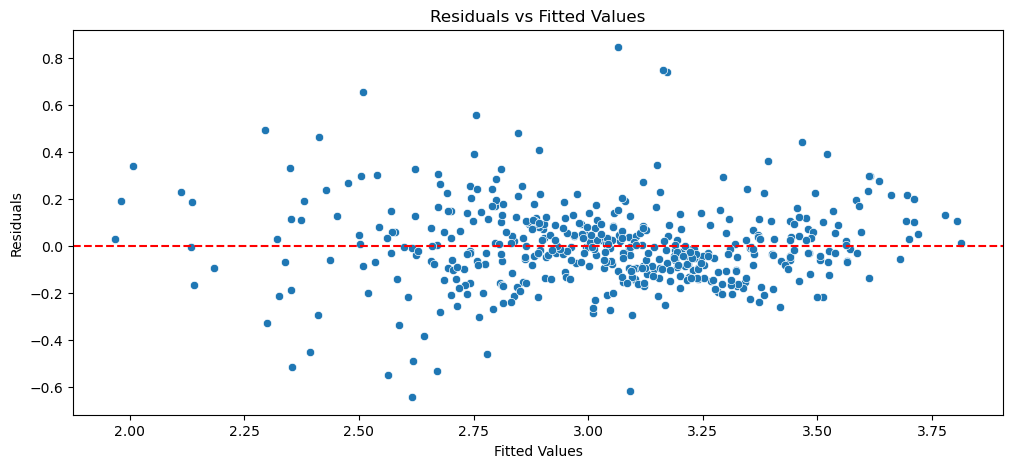

In [58]:
## Diagnostic checks for linear regression assumptions (normality, homoscedasticity, independence)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = model_reduced.resid

# Histogram (to check normality of residuals)
plt.figure(figsize=(12, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot (to check normality of residuals)
fig, ax = plt.subplots(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=ax)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Residuals vs Fitted values plot (to check homoscedasticity)
plt.figure(figsize=(12, 5))
sns.scatterplot(x=model_reduced.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#
vif_data_final = pd.DataFrame()
vif_data_final["Feature"] = X_reduced.columns  
vif_data_final["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# VIF 결과 출력
print("\n### final model's VIF ###")
print(vif_data_final)



### final model's VIF ###
   Feature         VIF
0    const  613.779660
1     crim    3.429324
2     chas    1.059716
3      nox    3.748589
4       rm    1.745519
5      dis    2.613994
6      rad    7.987614
7      tax    6.799910
8  ptratio    1.526450
9    lstat    2.597843
